<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/33_BB84Protocol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.9/929.9 KB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 

In [ ]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=350a9d16d30d7171b372c84bd89817a83b9323e524c2f3f6017054bde36b81ab
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


In [ ]:
from random import randint
bits =[]
for i in range(8):
    bit = randint(0,1)
    bits.append(bit)

In [ ]:
bits

[1, 0, 1, 1, 0, 0, 0, 0]

In [ ]:
from random import choice
basis = []
for i in range(8):
    base = choice(['X','Z'])
    basis.append(base)

In [ ]:
basis

['Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z']

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(8)
c = ClassicalRegister(8)
qc = QuantumCircuit(q,c)

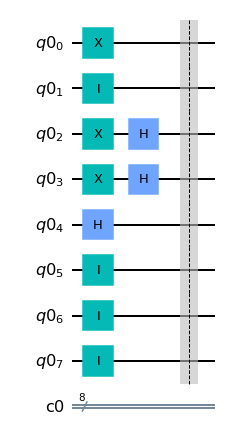

In [ ]:
for i in range(8):
    if basis[i]=='Z':
        if bits[i]==0:
            qc.i(q[i])
        else:
            qc.x(q[i])
    else:
        if bits[i]==0:
            qc.h(q[i])
        else:
            qc.x(q[i])
            qc.h(q[i])
qc.barrier()
qc.draw('mpl')

In [ ]:
bobs_base =[]
for i in range(8):
    base = choice(['X','Z'])
    bobs_base.append(base)

In [ ]:
bobs_base

['X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X']

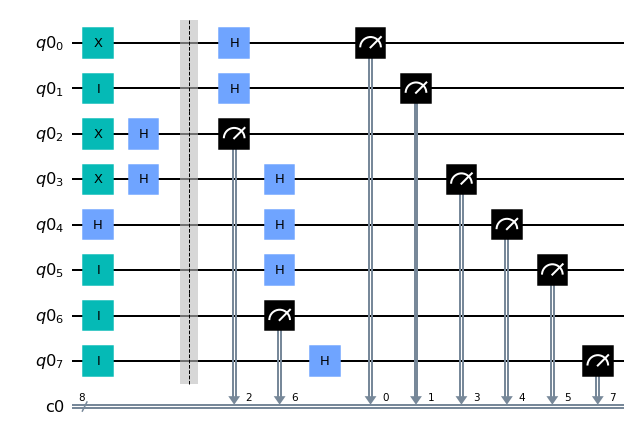

In [ ]:
for i in range(8):
    if bobs_base[i]=='Z':
        qc.measure(q[i],c[i])
    else:
        qc.h(q[i])
        qc.measure(q[i],c[i])
qc.draw('mpl')

{'10001010': 1}


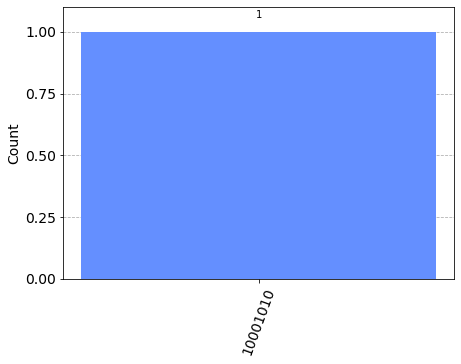

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
result = list(counts.keys())[0]

In [ ]:
result

'10001010'

In [ ]:
for i in range(8):
    if bobs_base[i]==basis[i]:
        print(result[i])

0
1
1
